## Vehicle Detection And Tracking Project

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector.
* Normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

In [1]:
import numpy as np
import cv2
import glob
import time
import pickle

from skimage.feature import hog
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from scipy.ndimage.measurements import label

from vehicle_detection import *

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def plot_images(images, figsize=(10, 5)):
    """Plot images helper."""
    
    f, (ax1, ax2) = plt.subplots(1, len(images), figsize=figsize)
    f.tight_layout()
    
    ax1.imshow(images[0][0])
    ax1.set_title(images[0][1], fontsize=10)
    ax2.imshow(images[1][0], cmap='gray')
    ax2.set_title(images[1][1], fontsize=10)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

def plot_hog(images, figsize=(10, 5)):
    """Plot images helper."""
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, len(images), figsize=figsize)
    f.tight_layout()
    
    ax1.imshow(images[0][0], cmap='gray')
    ax1.set_title(images[0][1], fontsize=10)
    ax2.imshow(images[1][0], cmap='gray')
    ax2.set_title(images[1][1], fontsize=10)
    
    ax3.imshow(images[2][0], cmap='gray')
    ax3.set_title(images[2][1], fontsize=10)
    ax4.imshow(images[3][0], cmap='gray')
    ax4.set_title(images[3][1], fontsize=10)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
def plot_heatmap(images, figsize=(10, 5)):
    """Plot images helper."""
    
    f, (ax1, ax2) = plt.subplots(1, len(images), figsize=figsize)
    f.tight_layout()
    
    ax1.imshow(images[0][0])
    ax1.set_title(images[0][1], fontsize=10)
    ax2.imshow(images[1][0], cmap='hot')
    ax2.set_title(images[1][1], fontsize=10)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

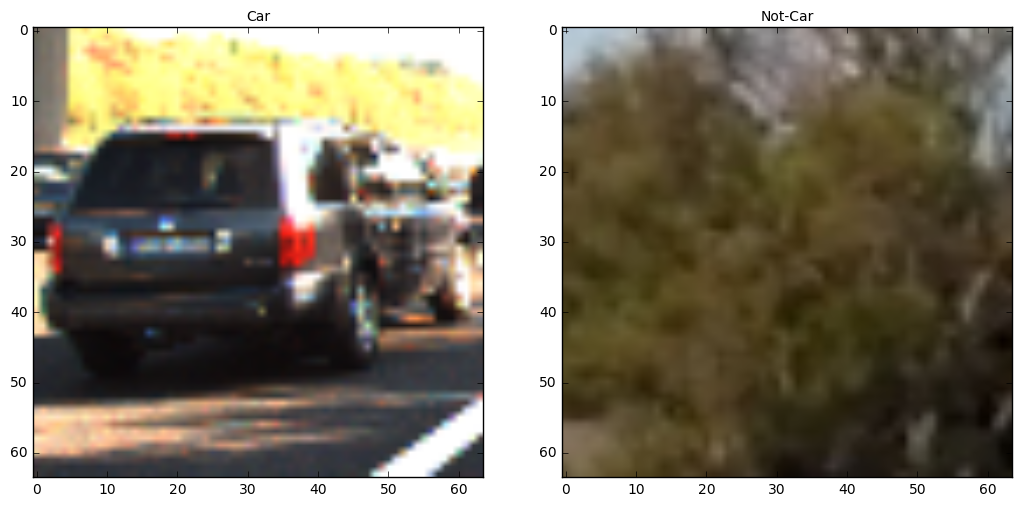

In [3]:
car_image = mpimg.imread('train_images/vehicles/KITTI_extracted/38.png')
notcar_image = mpimg.imread('train_images/non_vehicles/Extras/extra38.png')

plot_images([[car_image, "Car"], [notcar_image, "Not-Car"]])

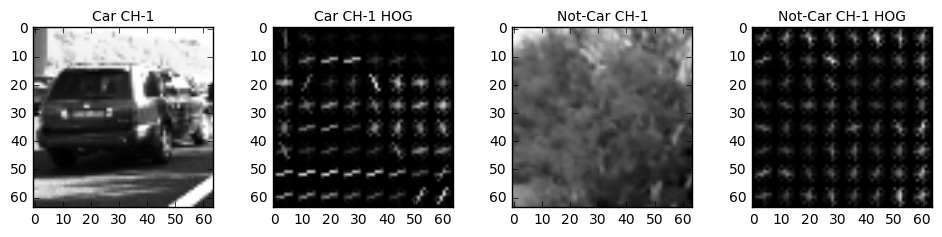

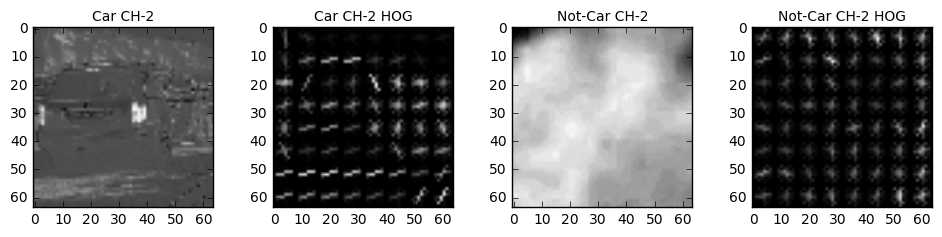

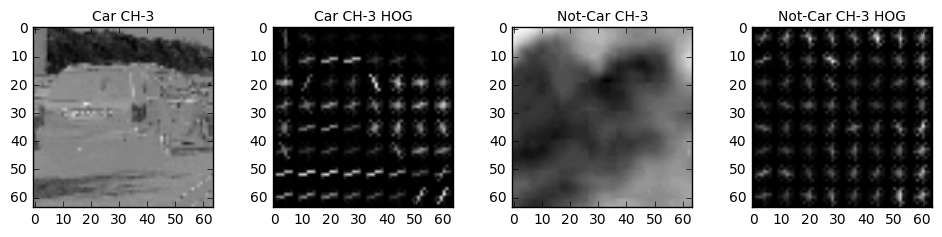

In [4]:
car_ycrcb = cv2.cvtColor(car_image, cv2.COLOR_RGB2YCrCb)
notcar_ycrcb = cv2.cvtColor(notcar_image, cv2.COLOR_RGB2YCrCb)

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2

car_features, car_hog = get_hog_features(car_ycrcb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
notcar_features, notcar_hog = get_hog_features(notcar_ycrcb[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

# CH-1
plot_hog([
    [car_ycrcb[:,:,0], 'Car CH-1'], [car_hog, 'Car CH-1 HOG'],
    [notcar_ycrcb[:,:,0], 'Not-Car CH-1'], [notcar_hog, 'Not-Car CH-1 HOG']], (9, 2))

# CH-2
plot_hog([
    [car_ycrcb[:,:,1], 'Car CH-2'], [car_hog, 'Car CH-2 HOG'],
    [notcar_ycrcb[:,:,1], 'Not-Car CH-2'], [notcar_hog, 'Not-Car CH-2 HOG']], (9, 2))

# CH-3
plot_hog([
    [car_ycrcb[:,:,2], 'Car CH-3'], [car_hog, 'Car CH-3 HOG'],
    [notcar_ycrcb[:,:,2], 'Not-Car CH-3'], [notcar_hog, 'Not-Car CH-3 HOG']], (9, 2))

In [5]:
# Train SVM Classifier
svc = train_classifier()

109.97 Seconds to extract HOG features...
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 8460
42.05 Seconds to train SVC...
Test Accuracy of SVC =  0.9882


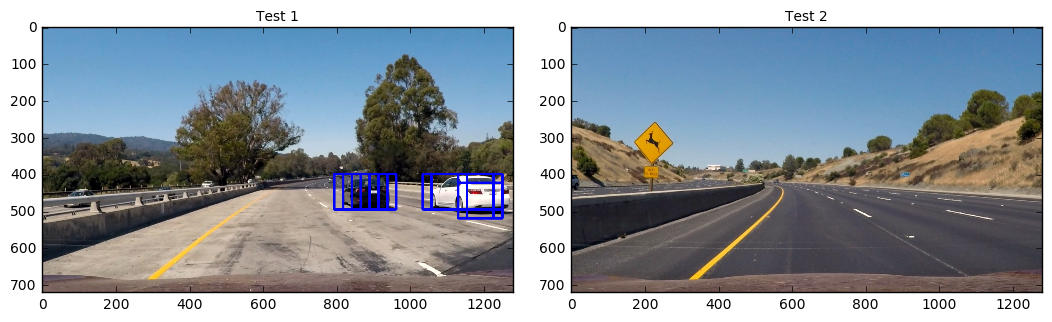

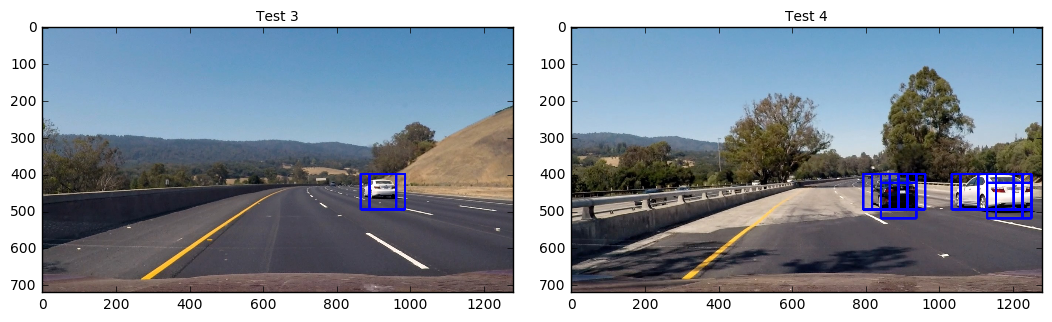

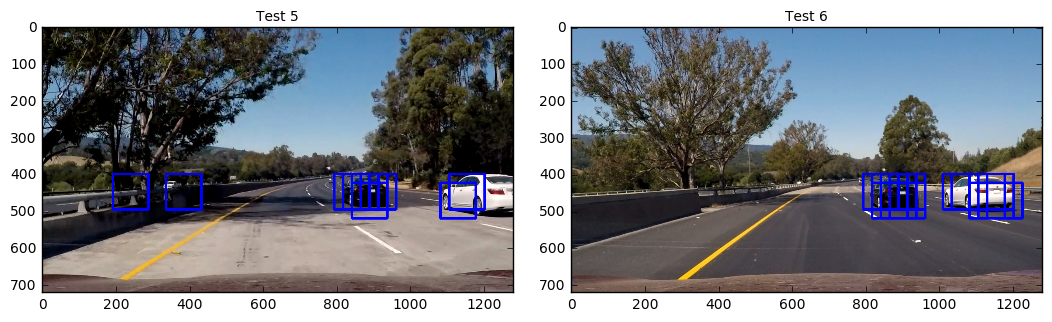

In [6]:
# Load svc pickle
dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )

svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]

ystart = 400
ystop = 656
scale = 1.5

# Test on test images
test_images = glob.glob("test_images/*")
out_images = []
box_list = []

for file in test_images:
    image = mpimg.imread(file)
    out_image, boxes = find_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    out_images.append(out_image)
    box_list.append(boxes)

plot_images([[out_images[0], "Test 1"], [out_images[1], "Test 2"]])
plot_images([[out_images[2], "Test 3"], [out_images[3], "Test 4"]])
plot_images([[out_images[4], "Test 5"], [out_images[5], "Test 6"]])

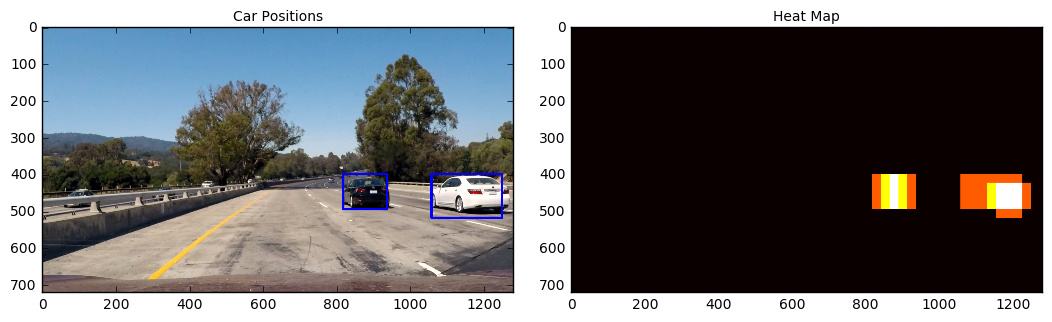

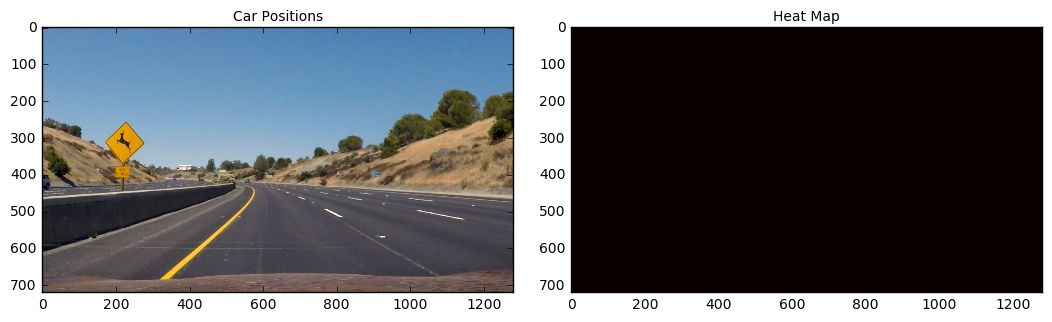

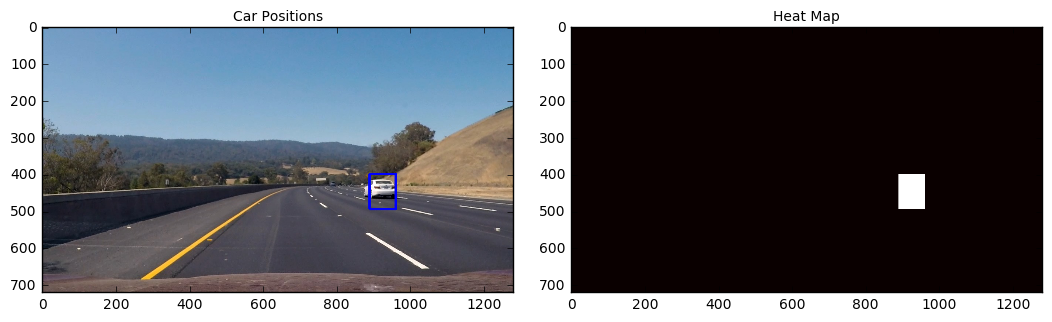

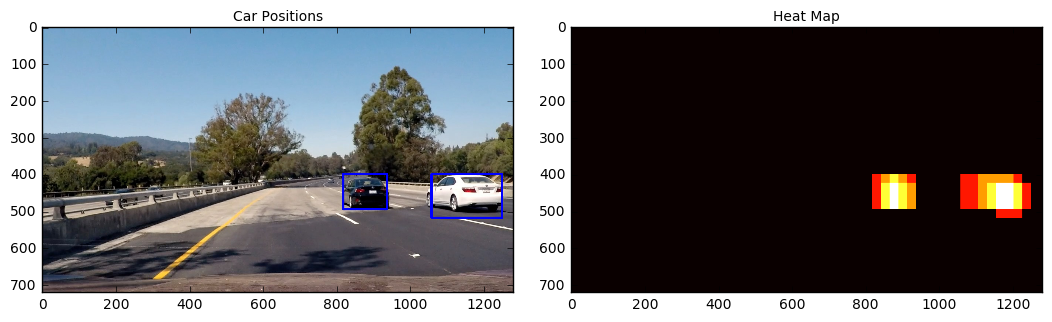

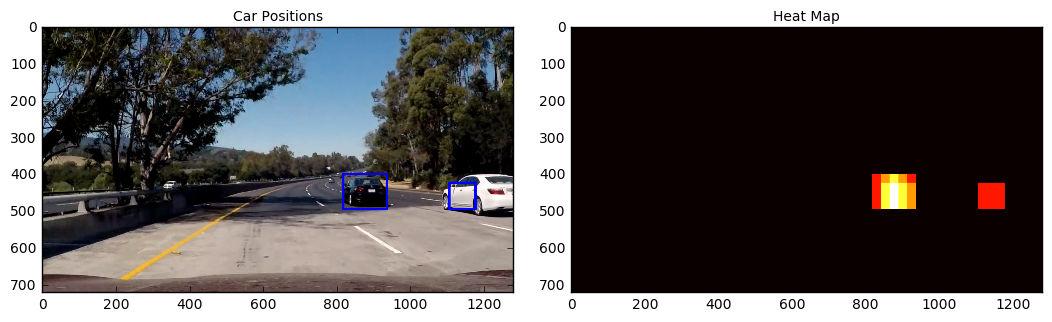

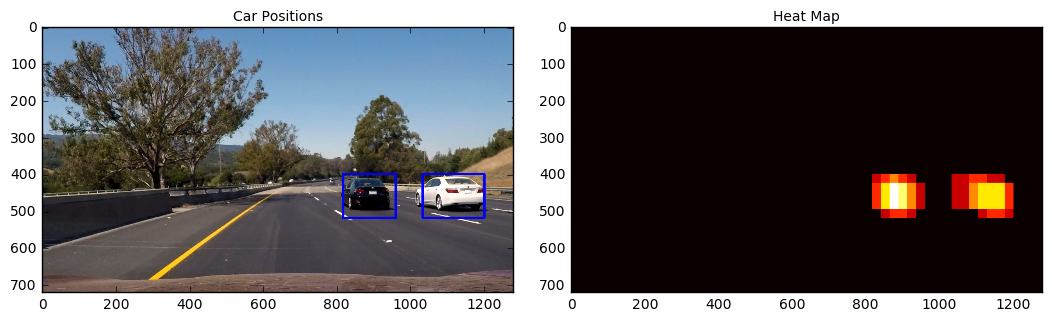

In [7]:
for file in test_images:
    image = mpimg.imread(file)
    out_image, heatmap = find_final_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
    plot_heatmap([[out_image, 'Car Positions'], [heatmap, 'Heat Map']])

In [8]:
prev_box_list = []
def process_video(image):
    out_image, _ = find_final_cars(image, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins, prev_box_list)
    return out_image

In [9]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [10]:
output_video = 'output_videos/test_video.mp4'
clip1 = VideoFileClip("test_videos/test_video.mp4")
output_clip = clip1.fl_image(process_video)
%time output_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video output_videos/test_video.mp4
[MoviePy] Writing video output_videos/test_video.mp4


 97%|█████████▋| 38/39 [00:12<00:00,  3.06it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/test_video.mp4 

CPU times: user 23.7 s, sys: 1.1 s, total: 24.8 s
Wall time: 14.4 s


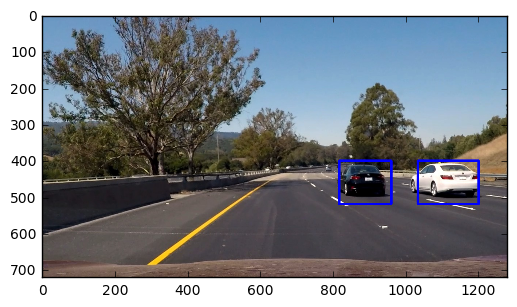

In [11]:
plt.imshow(out_image)

In [12]:
output_video = 'output_videos/project_video.mp4'
clip1 = VideoFileClip("test_videos/project_video.mp4")
output_clip = clip1.fl_image(process_video)
%time output_clip.write_videofile(output_video, audio=False)

[MoviePy] >>>> Building video output_videos/project_video.mp4
[MoviePy] Writing video output_videos/project_video.mp4


100%|█████████▉| 1260/1261 [07:18<00:00,  3.02it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_video.mp4 

CPU times: user 12min 52s, sys: 35.7 s, total: 13min 27s
Wall time: 7min 19s
